In [1]:
import os
import sys
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../../src")
from utils.file_utils import load_pkl
from mil_models.tokenizer import PrototypeTokenizer

/home/fywang/miniconda3/envs/spanther/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
feat_path = "/home/fywang/Documents/SPANTHER/src/splits/classification/ebrains/embeddings/uni_pt_patch_features_PANTHER_embeddings_proto_16_allcat_em_1_eps_1.0_tau_1.0.pkl"
result = load_pkl(feat_path)
# file_indices = np.arange

In [3]:
train_df = pd.read_csv("/home/fywang/Documents/SPANTHER/src/splits/classification/ebrains/train.csv")
train_df.sort_values

<bound method DataFrame.sort_values of            case_id                              slide_id  \
0     patient_1545  a1978ff4-357f-11eb-89b7-001a7dda7111   
1     patient_1358  a19657ba-357f-11eb-9b1e-001a7dda7111   
2     patient_2671  a19545c3-357f-11eb-add5-001a7dda7111   
3     patient_1667  a19805c7-357f-11eb-8525-001a7dda7111   
4     patient_1554  a19593bf-357f-11eb-96fe-001a7dda7111   
...            ...                                   ...   
1144  patient_1825  a1956d0e-357f-11eb-b1f2-001a7dda7111   
1145   patient_477  a1967e46-357f-11eb-83d0-001a7dda7111   
1146  patient_1676  a198051a-357f-11eb-a076-001a7dda7111   
1147   patient_499  a1951e8b-357f-11eb-ac37-001a7dda7111   
1148   patient_963  a19741ce-357f-11eb-baee-001a7dda7111   

                             diagnosis             diagnosis_group grade  \
0           Glioblastoma, IDH-wildtype  Adult-type diffuse gliomas    IV   
1           Glioblastoma, IDH-wildtype  Adult-type diffuse gliomas    IV   
2           

In [4]:
# result["train"]

In [5]:
X = result["train"]["X"]
print(X.shape)
label = result["train"]["y"]
print(label.shape)
slide_ids = result["train"]["slide_ids"]

torch.Size([1149, 32784])
torch.Size([1149])


In [6]:
# sort_indices = np.argsort(label)
# X = X[sort_indices]
# label = label[sort_indices]

In [7]:
tokenizer = PrototypeTokenizer(
    proto_model_type='PANTHER', out_type='allcat', p=16
)

In [8]:
prob, mean, cov = tokenizer(X)
print(X.shape)
print(prob.shape)
print(mean.shape)
print(cov.shape)

torch.Size([1149, 32784])
torch.Size([1149, 16])
torch.Size([1149, 16, 1024])
torch.Size([1149, 16, 1024])


In [9]:
norm_prob = F.normalize(prob, p=2, dim=1)
prob_sim = torch.mm(norm_prob, norm_prob.t()).cpu().detach().numpy()

tensor(1.00)


/tmp/ipykernel_3596327/4044099822.py:1: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3683.)
  print(norm_prob[422] @ norm_prob[719].T)


<BarContainer object of 16 artists>

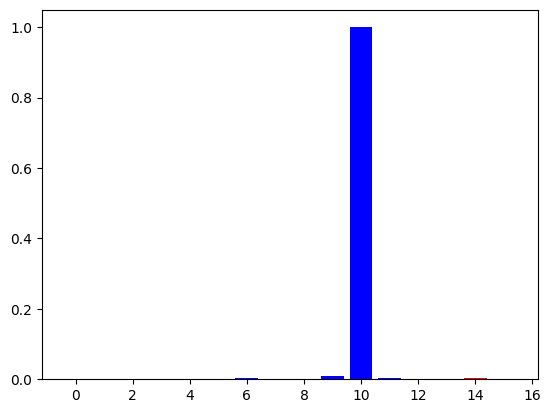

In [10]:
print(norm_prob[422] @ norm_prob[719].T)
# print(norm_prob[460] @ norm_prob[471].T)
plt.bar(np.arange(16), norm_prob[422], color="r")
# plt.bar(np.arange(16), norm_prob[460], color="g")
plt.bar(np.arange(16), norm_prob[719], color="b")

In [11]:
print(slide_ids[422])
print(slide_ids[460])
print(slide_ids[471])

a195baf6-357f-11eb-8f0f-001a7dda7111
a1956d05-357f-11eb-8d40-001a7dda7111
a197de24-357f-11eb-8e5f-001a7dda7111


In [12]:
train_df[train_df["slide_id"] == slide_ids[422]].T

,422
case_id,patient_2593
slide_id,a195baf6-357f-11eb-8f0f-001a7dda7111
diagnosis,Ganglioglioma
diagnosis_group,Glioneuronal and neuronal tumours
grade,I
subtype,NaN
secondary_diagnosis,NaN
control,0
age,17.0
sex,male


In [13]:
train_df[train_df["slide_id"] == slide_ids[460]].T

,460
case_id,patient_1458
slide_id,a1956d05-357f-11eb-8d40-001a7dda7111
diagnosis,Schwannoma
diagnosis_group,Cranial and paraspinal nerve tumours
grade,I
subtype,NaN
secondary_diagnosis,NaN
control,0
age,45.0
sex,male


In [14]:
train_df[train_df["slide_id"] == slide_ids[471]].T

,471
case_id,patient_2686
slide_id,a197de24-357f-11eb-8e5f-001a7dda7111
diagnosis,Schwannoma
diagnosis_group,Cranial and paraspinal nerve tumours
grade,I
subtype,NaN
secondary_diagnosis,NaN
control,0
age,78.0
sex,male


In [15]:
label_np = label.detach().numpy()
label_np

array([ 0,  0,  0, ..., 29, 29, 29])

In [16]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
label_onehot = enc.fit_transform(label_np.reshape(-1, 1)).toarray()
print(label_onehot.shape)

(1149, 30)


<Axes: >

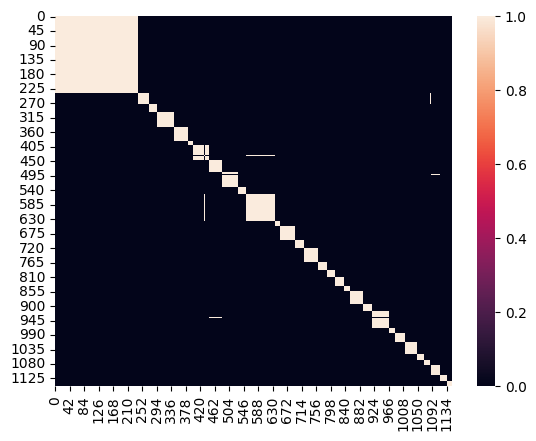

In [17]:
label_sim = label_onehot @ label_onehot.T
sns.heatmap(label_sim)

Text(0.5, 1.0, 'Similarity of Labels')

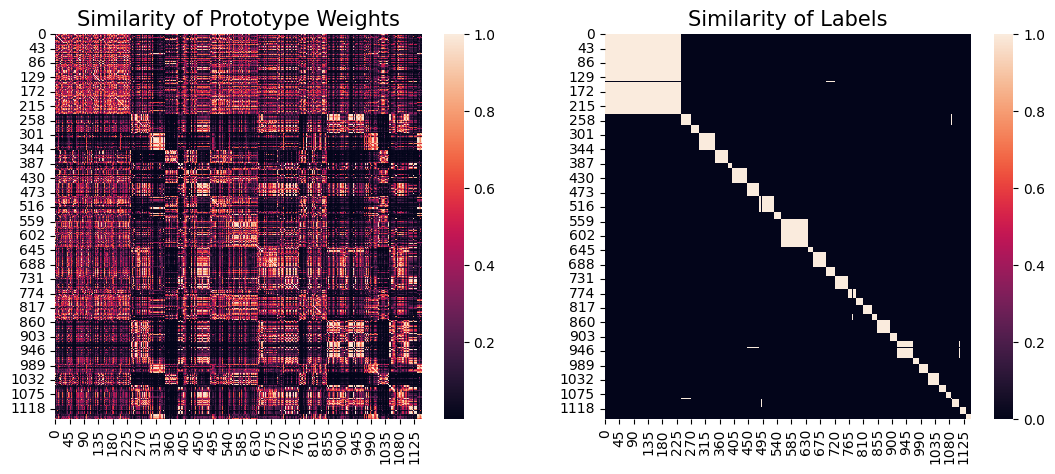

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(prob_sim, ax=ax1)
sns.heatmap(label_sim, ax=ax2)

ax1.set_title("Similarity of Prototype Weights", fontsize=15)
ax2.set_title("Similarity of Labels", fontsize=15)
# plt.savefig("similarity_matrix.pdf", bbox_inches='tight', dpi=300)
# plt.savefig("similarity_matrix.png", bbox_inches='tight', dpi=300)

In [19]:
neg_indices = np.where(label_sim == 0)
# positive_indices = np.where(label_sim == 1)
# make sure the diagonal is 1
# np.fill_diagonal(prob_sim, 1)
# positive_prob_sim = prob_sim[positive_indices] # it should be pretty high ...
neg_prob_sim = prob_sim[neg_indices]

In [20]:
neg_prob_sim

array([0.15773953, 0.13725129, 0.03608985, ..., 0.00061037, 0.04241838,
       0.01282195], dtype=float32)

In [25]:
np.sort(neg_prob_sim)[::-1][100:]

array([9.9835581e-01, 9.9835581e-01, 9.9832654e-01, ..., 4.9700822e-07,
       2.1240049e-07, 2.1240049e-07], dtype=float32)

In [23]:
np.argsort(neg_prob_sim)[::-1][100:]

array([ 981162,  908828,  907720, ..., 1214457,  286953,  420863])

In [26]:
print(neg_indices[0][981162], neg_indices[1][981162])

927 862


In [40]:
prob_sim[460, 719]

0.9998552

In [41]:
label_sim[460, 719]

0.0

In [27]:
train_df.iloc[927].T

case_id                                        patient_1758
slide_id               a1971ae1-357f-11eb-b8f2-001a7dda7111
diagnosis                         Meningothelial meningioma
diagnosis_group                                 Meningiomas
grade                                                     I
subtype                                                 NaN
secondary_diagnosis                                     NaN
control                                                   0
age                                                    64.0
sex                                                  female
location                                                 []
laterality                                              NaN
cellularity                                      4777.76783
tissue_area                                      102.329167
recurrence                                              0.0
comment                                                 NaN
strat_label                             

In [28]:
train_df.iloc[862].T

case_id                                         patient_287
slide_id               a196a577-357f-11eb-a207-001a7dda7111
diagnosis                               Atypical meningioma
diagnosis_group                                 Meningiomas
grade                                                    II
subtype                                                 NaN
secondary_diagnosis                                     NaN
control                                                   0
age                                                    53.0
sex                                                  female
location                                                 []
laterality                                              NaN
cellularity                                     6931.643282
tissue_area                                      306.273839
recurrence                                              0.0
comment                                                 NaN
strat_label                             

In [ ]:
sns.displot(positive_prob_sim, kde=True)

In [ ]:
# tri_prob = prob_sim.tril_(diagonal=-1).flatten()
tri_prob_sim = np.tril(prob_sim, k=-1).flatten()
# remove diagnonal elements ...
non_zero_indices = np.where(tri_prob_sim != 0)
tri_prob_sim = tri_prob_sim[non_zero_indices]
# tri_label = label_sim.tril_(diagonal=-1).flatten()
tri_label_sim = np.tril(label_sim, k=-1).flatten()
tri_label_sim = tri_label_sim[non_zero_indices]

In [ ]:
indices = np.argsort(tri_prob_sim)[::-1]
sorted_tri_prob_sim = tri_prob_sim[indices]
sorted_tri_label_sim = tri_label_sim[indices]

In [ ]:
sorted_tri_prob_sim

In [ ]:
sorted_tri_label_sim

In [ ]:
non_zero_indices = np.where(sorted_tri_label_sim != 0)
zero_indices = np.where(sorted_tri_label_sim == 0)
prob_1 = sorted_tri_prob_sim[non_zero_indices]
prob_2 = sorted_tri_prob_sim[zero_indices]

In [ ]:
prob_1

In [ ]:
prob_2

In [ ]:
sns.displot(prob_1, kind="kde")

In [ ]:
sns.displot(prob_2, kind="kde")

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
# sns.kdeplot(prob_1, ax=ax1, fill=True)
sns.kdeplot(prob_1, ax=ax1, fill=True)
ax1.set_title("Distribution of prototype weights for samples \nbelonging to the same class", fontsize=15)
ax1.set_xlabel("Similarity of prototype weight", fontsize=15)
ax1.set_ylabel("Density", fontsize=15)
# ax1.
# sns.kdeplot(prob_2, ax=ax2, fill=True)
sns.kdeplot(prob_2, ax=ax2, fill=True)
ax2.set_title("Distribution of prototype weights for samples \nbelonging to different classes", 
              fontsize=15)
ax2.set_xlabel("Similarity of prototype weight", fontsize=15)
ax2.set_ylabel("Density", fontsize=15)
plt.savefig("prototype_weight_distribution.pdf", bbox_inches='tight')